In [108]:
from warnings import filterwarnings
filterwarnings("ignore")

In [109]:
import pandas as pd
df=pd.read_csv("training_set.csv")

In [110]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [112]:
m=df.isna().sum()
m[m>0]

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [113]:
df.duplicated().sum()

np.int64(0)

In [114]:
X=df.drop(columns=["Id","SalePrice"])
Y=df[["SalePrice"]]

In [115]:
X.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [116]:
Y.head()

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000


In [117]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [118]:
cat=list(X.columns[X.dtypes=="object"])
con=list(X.columns[X.dtypes!="object"])

In [119]:
cat

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [120]:
con

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [121]:
from http.cookies import SimpleCookie


num_pipe=make_pipeline(SimpleImputer(strategy="median"),StandardScaler())

In [122]:
cat_pipe=make_pipeline(SimpleImputer(strategy="constant",fill_value="NotAvail"),OrdinalEncoder())

In [123]:
pre=ColumnTransformer(
    [
        ("num",num_pipe,con),
        ("cat",cat_pipe,cat)
    ]
).set_output(transform="pandas")

In [124]:
X_pre=pre.fit_transform(X)

In [125]:
X_pre

,num__MSSubClass,num__LotFrontage,num__LotArea,num__OverallQual,num__OverallCond,num__YearBuilt,num__YearRemodAdd,num__MasVnrArea,num__BsmtFinSF1,num__BsmtFinSF2,...,cat__GarageType,cat__GarageFinish,cat__GarageQual,cat__GarageCond,cat__PavedDrive,cat__PoolQC,cat__Fence,cat__MiscFeature,cat__SaleType,cat__SaleCondition
0,0.073375,-0.220875,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.514104,0.575425,-0.288653,...,1.0,2.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,4.0
1,-0.872563,0.460320,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.570750,1.171992,-0.288653,...,1.0,2.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,4.0
2,0.073375,-0.084636,0.073480,0.651479,-0.517200,0.984752,0.830215,0.325915,0.092907,-0.288653,...,1.0,2.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,4.0
3,0.309859,-0.447940,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.570750,-0.499274,-0.288653,...,5.0,3.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,0.0
4,0.073375,0.641972,0.375148,1.374795,-0.517200,0.951632,0.733308,1.366489,0.463568,-0.288653,...,1.0,2.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.073375,-0.357114,-0.260560,-0.071836,-0.517200,0.918511,0.733308,-0.570750,-0.973018,-0.288653,...,1.0,2.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,4.0
1456,-0.872563,0.687385,0.266407,-0.071836,0.381743,0.222975,0.151865,0.087911,0.759659,0.722112,...,1.0,3.0,5.0,5.0,2.0,3.0,2.0,1.0,8.0,4.0
1457,0.309859,-0.175462,-0.147810,0.651479,3.078570,-1.002492,1.024029,-0.570750,-0.369871,-0.288653,...,1.0,2.0,5.0,5.0,2.0,3.0,0.0,3.0,8.0,4.0
1458,-0.872563,-0.084636,-0.080160,-0.795151,0.381743,-0.704406,0.539493,-0.570750,-0.865548,6.092188,...,1.0,3.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,4.0


In [126]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector

In [128]:
base_model=LinearRegression()
sel=SequentialFeatureSelector(base_model,n_features_to_select="auto",direction="backward")
sel.fit(X_pre,Y)
imp_cols=sel.get_feature_names_out()

In [129]:
imp_col=[col.split("__")[1] for col in imp_cols ]

In [130]:
imp_col

['MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'MasVnrArea',
 'BsmtFinSF2',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'Fireplaces',
 'GarageCars',
 'WoodDeckSF',
 'EnclosedPorch',
 'ScreenPorch',
 'PoolArea',
 'YrSold',
 'MSZoning',
 'LandContour',
 'BldgType',
 'HouseStyle',
 'RoofMatl',
 'Exterior1st',
 'MasVnrType',
 'ExterQual',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'HeatingQC',
 'KitchenQual',
 'Functional',
 'GarageFinish',
 'PavedDrive',
 'MiscFeature',
 'SaleCondition']

In [131]:
X_sel=X[imp_col]

In [132]:
X_sel.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,BsmtFinSF2,1stFlrSF,2ndFlrSF,LowQualFinSF,...,BsmtCond,BsmtExposure,BsmtFinType1,HeatingQC,KitchenQual,Functional,GarageFinish,PavedDrive,MiscFeature,SaleCondition
0,60,8450,7,5,2003,196.0,0,856,854,0,...,TA,No,GLQ,Ex,Gd,Typ,RFn,Y,NaN,Normal
1,20,9600,6,8,1976,0.0,0,1262,0,0,...,TA,Gd,ALQ,Ex,TA,Typ,RFn,Y,NaN,Normal
2,60,11250,7,5,2001,162.0,0,920,866,0,...,TA,Mn,GLQ,Ex,Gd,Typ,RFn,Y,NaN,Normal
3,70,9550,7,5,1915,0.0,0,961,756,0,...,Gd,No,ALQ,Gd,Gd,Typ,Unf,Y,NaN,Abnorml
4,60,14260,8,5,2000,350.0,0,1145,1053,0,...,TA,Av,GLQ,Ex,Gd,Typ,RFn,Y,NaN,Normal


In [133]:
cat_sel=list(X_sel.columns[X_sel.dtypes=="object"])
con_sel=list(X_sel.columns[X_sel.dtypes!="object"])

In [134]:
cat_sel

['MSZoning',
 'LandContour',
 'BldgType',
 'HouseStyle',
 'RoofMatl',
 'Exterior1st',
 'MasVnrType',
 'ExterQual',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'HeatingQC',
 'KitchenQual',
 'Functional',
 'GarageFinish',
 'PavedDrive',
 'MiscFeature',
 'SaleCondition']

In [135]:
con_sel

['MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'MasVnrArea',
 'BsmtFinSF2',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'Fireplaces',
 'GarageCars',
 'WoodDeckSF',
 'EnclosedPorch',
 'ScreenPorch',
 'PoolArea',
 'YrSold']

In [136]:
from sklearn.preprocessing import OneHotEncoder

In [137]:
num_pipe2=make_pipeline(SimpleImputer(strategy="median"),StandardScaler())

In [138]:
cat_pipe2=make_pipeline(SimpleImputer(strategy="constant",fill_value="Not Avail"),OneHotEncoder(handle_unknown="ignore",sparse_output=False))

In [139]:
pre2=ColumnTransformer(
    [
        ("num",num_pipe2,con_sel),
        ("cat",cat_pipe2,cat_sel)
    ]
).set_output(transform="pandas")

In [140]:
X_sel_pre=pre2.fit_transform(X_sel)
X_sel_pre.shape

(1460, 135)

In [141]:
from sklearn.model_selection import train_test_split

In [142]:
xtrain,xtest,ytrain,ytest=train_test_split(X_sel_pre,Y,test_size=0.2,random_state=21)

In [143]:
xtrain.shape

(1168, 135)

In [144]:
xtest.shape

(292, 135)

In [145]:
model1=LinearRegression()
model1.fit(xtrain,ytrain)

LinearRegression()

In [146]:
model1.score(xtest,ytest)

0.7861588317857293

In [147]:
import numpy as np
params={"alpha":np.arange(start=0.1,stop=100,step=0.1)}

In [148]:
params

{'alpha': array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
         1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
         2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
         3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
         4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
         5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
         6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,  7.7,
         7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,  8.8,
         8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,  9.9,
        10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9, 11. ,
        11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. , 12.1,
        12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1, 13.2,
        13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2, 14.3,
        14.4, 14.5, 14.6, 14.

In [149]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV


base_ridge=Ridge()
gscv_ridge=GridSearchCV(base_ridge,param_grid=params,scoring="r2",cv=5,n_jobs=-1)
gscv_ridge.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
        2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
        3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
        4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
        5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
        6.7,  6.8,  6.9,  7. ,  7.1,...
       92.5, 92.6, 92.7, 92.8, 92.9, 93. , 93.1, 93.2, 93.3, 93.4, 93.5,
       93.6, 93.7, 93.8, 93.9, 94. , 94.1, 94.2, 94.3, 94.4, 94.5, 94.6,
       94.7, 94.8, 94.9, 95. , 95.1, 95.2, 95.3, 95.4, 95.5, 95.6, 95.7,
       95.8, 95.9, 96. , 96.1, 96.2, 96.3, 96.4, 96.5, 96.6, 96.7, 96.8,
       96.9, 97. , 97.1, 97.2, 97.3, 97.4, 97.5, 97.6, 97.7, 97.8, 97.9,
       98. , 98.1, 98.2, 98.3, 98.4, 98.5, 98.6, 98.7, 98.8, 98.9, 99. ,
       99.1, 99.2, 99.3, 99.4, 99.5, 99.6, 99.7, 99.8, 99.9])},
             scoring='r2')

In [150]:
gscv_ridge.best_score_

np.float64(0.8402651942238981)

In [151]:
best_ridge=gscv_ridge.best_estimator_

In [152]:
best_ridge.score(xtest,ytest)

0.8165375984929328

In [153]:
gscv_ridge.best_params_

{'alpha': np.float64(38.1)}

In [154]:
from sklearn.linear_model import Lasso
params={"alpha":np.arange(start=100,stop=400,step=1)}

In [155]:



base_lasso=Lasso()
gscv_lasso=GridSearchCV(base_lasso,param_grid=params,scoring="r2",cv=5,n_jobs=-1)
gscv_lasso.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': array([100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,
       113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
       126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138,
       139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151,
       152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164,
       165, 166, 167, 168, 1...
       308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320,
       321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333,
       334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346,
       347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359,
       360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372,
       373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385,
       386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398,
       399])},
             scoring='r2')

In [156]:
gscv_lasso.best_score_

np.float64(0.8441492396240011)

In [157]:
gscv_lasso.best_params_

{'alpha': np.int64(199)}

In [158]:
best_lasso=gscv_lasso.best_estimator_

In [159]:
best_lasso.score(xtest,ytest)
from sklearn.metrics import(root_mean_squared_error,mean_absolute_error,mean_absolute_percentage_error,r2_score)

In [160]:
def evaluate(model,x,y):
    ypred=model.predict(x)
    #Evaluate
    rmse=root_mean_squared_error(y,ypred)
    mae=mean_absolute_error(y,ypred)
    mape=mean_absolute_percentage_error(y,ypred)
    r2=r2_score(y,ypred)
    #print
    print(f"root_mean_squared_error :{rmse}")
    print(f"mean absoulte error : {mae}")
    print(f"mean absolute percentage error :{mape}")
    print(f"r2 score :{r2}")

In [161]:
evaluate(best_lasso,xtest,ytest)

root_mean_squared_error :36055.66401051413
mean absoulte error : 18617.304347821104
mean absolute percentage error :0.10764169441278043
r2 score :0.8081819295786766


In [162]:
evaluate(best_ridge,xtest,ytest)

root_mean_squared_error :35261.62123583921
mean absoulte error : 18498.155169575643
mean absolute percentage error :0.10554900606591451
r2 score :0.8165375984929328


In [163]:
evaluate(model1,xtest,ytest)

root_mean_squared_error :38069.256780451135
mean absoulte error : 19531.220890410958
mean absolute percentage error :0.11514541664392546
r2 score :0.7861588317857293


In [164]:
xnew=pd.read_csv("sample_set.csv")

In [165]:
xnew_pre=pre2.transform(xnew)
xnew_pre

,num__MSSubClass,num__LotArea,num__OverallQual,num__OverallCond,num__YearBuilt,num__MasVnrArea,num__BsmtFinSF2,num__1stFlrSF,num__2ndFlrSF,num__LowQualFinSF,...,cat__MiscFeature_Not Avail,cat__MiscFeature_Othr,cat__MiscFeature_Shed,cat__MiscFeature_TenC,cat__SaleCondition_Abnorml,cat__SaleCondition_AdjLand,cat__SaleCondition_Alloca,cat__SaleCondition_Family,cat__SaleCondition_Normal,cat__SaleCondition_Partial
0,-0.872563,0.110763,-0.795151,0.381743,-0.340077,-0.570750,0.604293,-0.689929,-0.795163,-0.120242,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.872563,0.375850,-0.071836,0.381743,-0.439440,0.027027,-0.288653,0.430511,-0.795163,-0.120242,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.073375,0.332053,-0.795151,-0.517200,0.852269,-0.570750,-0.288653,-0.607125,0.811239,-0.120242,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.073375,-0.054002,-0.071836,0.381743,0.885390,-0.460051,-0.288653,-0.612300,0.758532,-0.120242,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.492282,-0.552407,1.374795,-0.517200,0.686666,-0.570750,-0.288653,0.303718,-0.795163,-0.120242,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2.438219,-0.859988,-1.518467,1.280685,-0.041991,-0.570750,-0.288653,-1.595596,0.456043,-0.120242,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1455,2.438219,-0.864197,-1.518467,-0.517200,-0.041991,-0.570750,-0.288653,-1.595596,0.456043,-0.120242,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1456,-0.872563,0.950423,-0.795151,1.280685,-0.373198,-0.570750,-0.288653,0.158811,-0.795163,-0.120242,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1457,0.664586,-0.007600,-0.795151,-0.517200,0.686666,-0.570750,-0.288653,-0.498445,-0.795163,-0.120242,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [166]:
preds=best_ridge.predict(xnew_pre)

In [167]:
res=xnew[["Id"]]
res["SalePrice"]=preds

In [168]:
res=res.round(2)

In [169]:
res.to_csv("Results.csv",index=False)

In [170]:
res

,Id,SalePrice
0,1461,114490.30
1,1462,146663.07
2,1463,175665.47
3,1464,190847.50
4,1465,187324.02
...,...,...
1454,2915,75532.39
1455,2916,70321.09
1456,2917,171324.53
1457,2918,107315.69


<Axes: xlabel='SalePrice', ylabel='Count'>

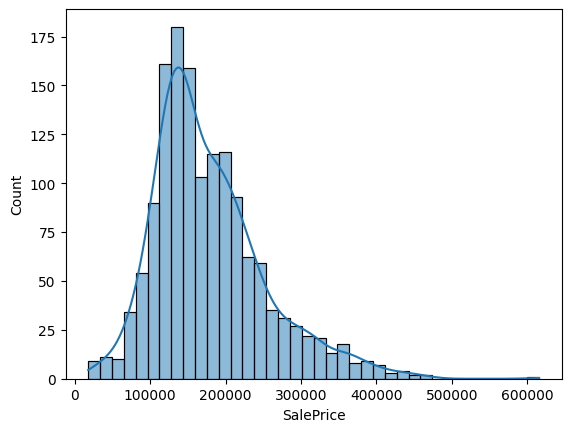

In [171]:
import seaborn as sns
sns.histplot(data=res,x="SalePrice",kde=True)

<Axes: xlabel='SalePrice', ylabel='Count'>

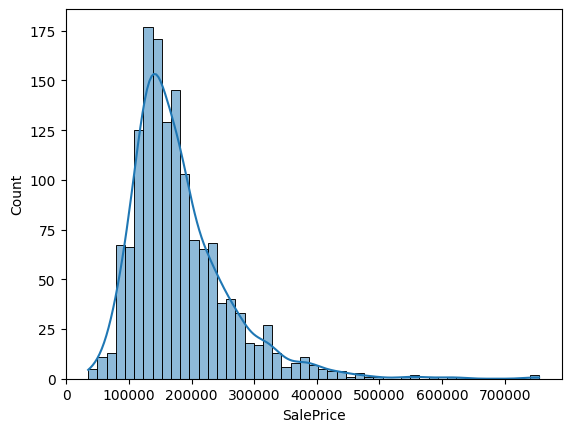

In [172]:
sns.histplot(data=df,x="SalePrice",kde=True)

In [173]:
%pip install joblib

Note: you may need to restart the kernel to use updated packages.


In [174]:
import joblib
joblib.dump(pre2,"pre.joblib")

['pre.joblib']

In [175]:
joblib.dump(best_ridge,"ridge.joblib")

['ridge.joblib']

In [176]:
p=joblib.load("pre.joblib")

In [177]:
p

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['MSSubClass', 'LotArea', 'OverallQual',
                                  'OverallCond', 'YearBuilt', 'MasVnrArea',
                                  'BsmtFinSF2', '1stFlrSF', '2ndFlrSF',
                                  'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
                                  'BsmtHalfBath', 'Fireplaces', 'GarageCars',
                                  'WoodDeckSF...
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['MSZoning', 'LandContour', 'BldgType',
                                  'HouseStyle', 'RoofMatl', 'Exterior1st',
                                  'MasVnrType', 'ExterQual', 'Foundation',
                                  'BsmtQual', 'BsmtCond', 'BsmtExposure',
                                  'BsmtFinType1', 'HeatingQC', 'KitchenQual',
                                  'Functional', 'GarageFinish', 'PavedDrive',
                                  'MiscFeature', 'SaleCondition'])])

In [178]:
m=joblib.load("ridge.joblib")

In [179]:
m

Ridge(alpha=np.float64(38.1))